In [8]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

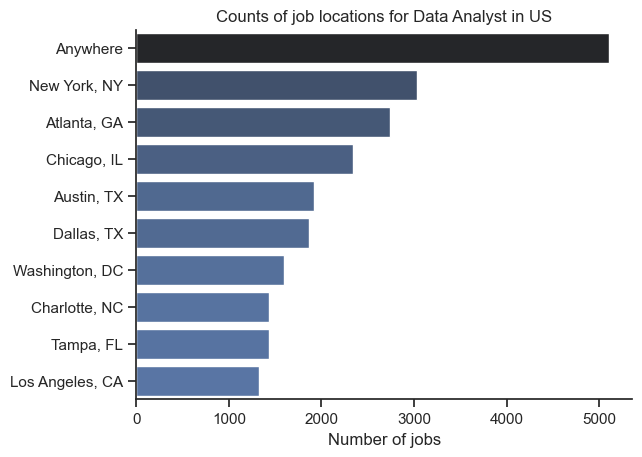

In [15]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title("Counts of job locations for Data Analyst in US")
plt.xlabel("Number of jobs")
plt.ylabel("")
plt.show()

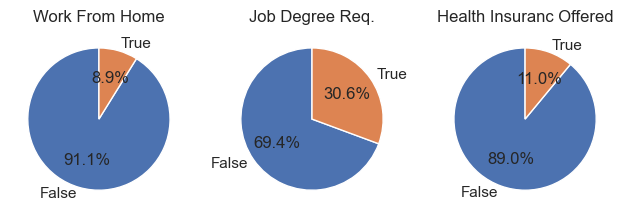

In [16]:
fig, ax = plt.subplots(1, 3)
dict_column = {
    'job_work_from_home' : 'Work From Home',
    'job_no_degree_mention' : 'Job Degree Req.',
    'job_health_insurance' : 'Health Insuranc Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['False', 'True'])
    ax[i].set_title(title)
fig.tight_layout()

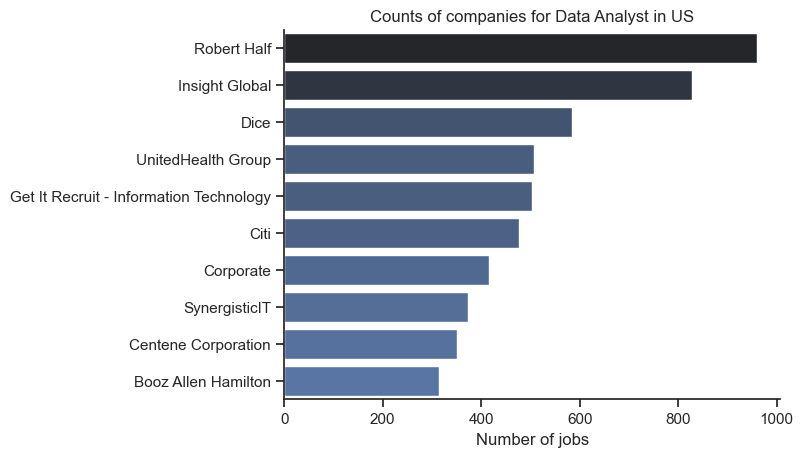

In [18]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title("Counts of companies for Data Analyst in US")
plt.xlabel("Number of jobs")
plt.ylabel("")
plt.show()